In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
mind = pd.read_csv('raw_mindwave.csv').set_index('time').drop(columns=['raw', 'attention', 'meditation'])
muse = pd.read_csv('raw_muse.csv').set_index('time').drop(columns=['raw'])

mind.index = pd.to_datetime(mind.index)
muse.index = pd.to_datetime(muse.index)

mind_df = mind.groupby([mind.index.minute, mind.index.second, mind.index.microsecond//1e5]).mean()
muse_df = muse.groupby([muse.index.minute, muse.index.second, muse.index.microsecond//1e5]).mean() ** 2 # <<============ เพิ่งเพิมใน muse

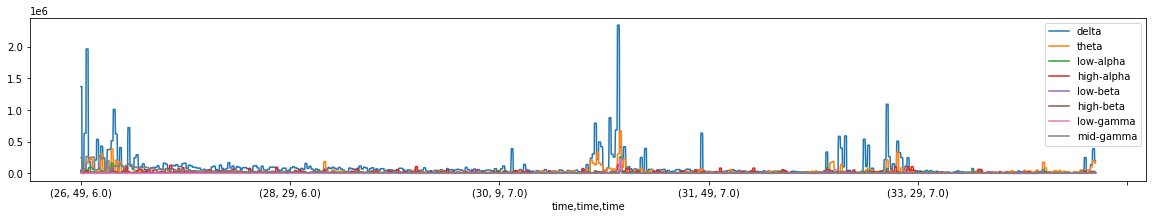

In [4]:
mind_df.plot(figsize=(20, 3))

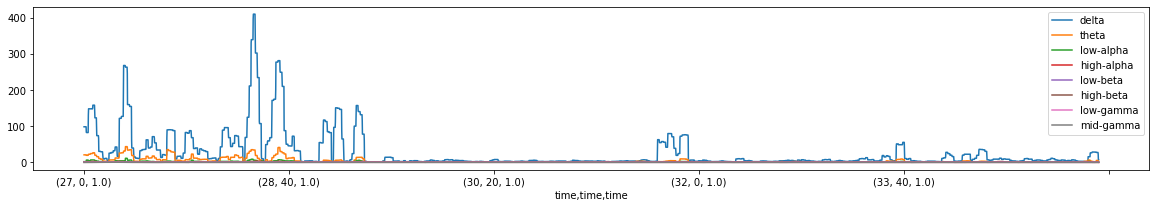

In [5]:
muse_df.plot(figsize=(20, 3))

In [6]:
from scipy.optimize import fmin, minimize
from scipy.stats import normaltest

def _func(c, array): 
    return np.abs(np.std(array ** (1/c)) - 1)

def _calculate_c(array):
    res = fmin(_func, 1, args=(array,), disp=0)
    return res[0]

def get_c_array(df):
    return np.array([_calculate_c(df[col]) for col in df.columns])

def normalize(df):
    return df ** (1/get_c_array(df))

mind_c = get_c_array(mind_df)

# print(get_c_array(mind_df))
# print(get_c_array(muse_df))

mind_n = normalize(mind_df)
muse_n = normalize(muse_df)

# print(mind_n.mean())
# print(muse_n.mean())

muse_df = (muse_n - muse_n.mean() + mind_n.mean()) ** mind_c

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B83FA110F0>,
      dtype=object)

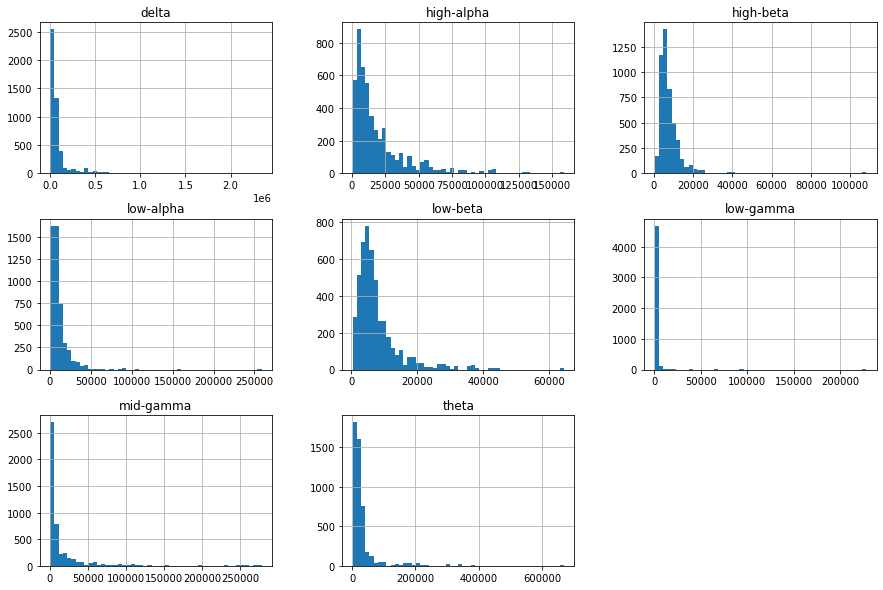

In [7]:
mind_df.hist(bins=50, figsize=(15, 10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B841819550>,
      dtype=object)

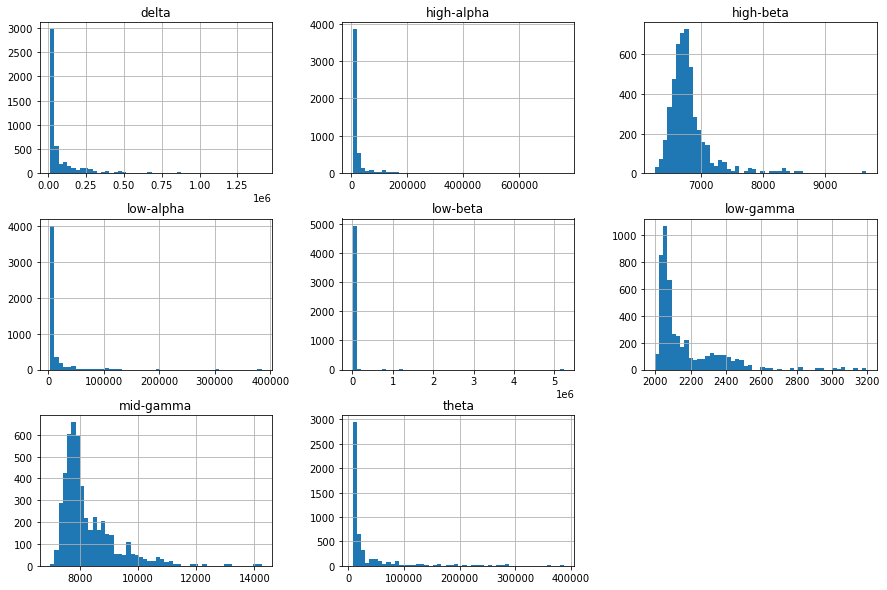

In [8]:
muse_df.hist(bins=50, figsize=(15, 10))

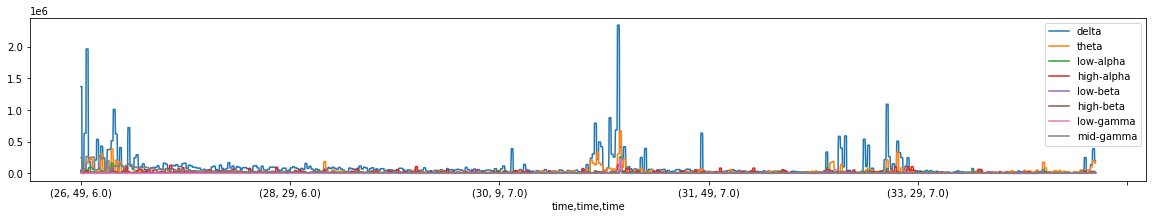

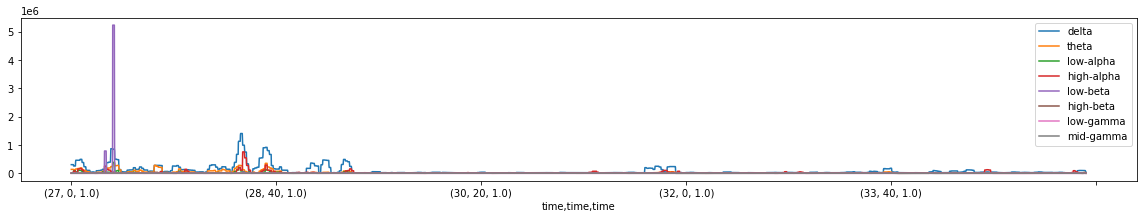

In [13]:
mind_df.plot(figsize=(20, 3))
muse_df.plot(figsize=(20, 3))

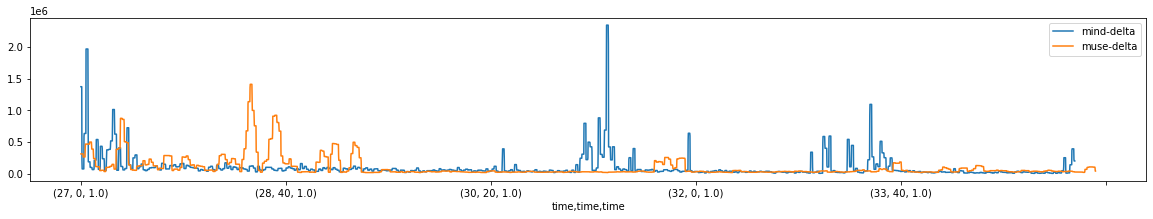

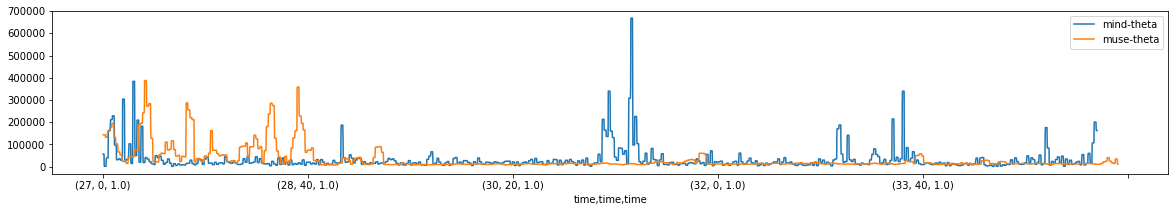

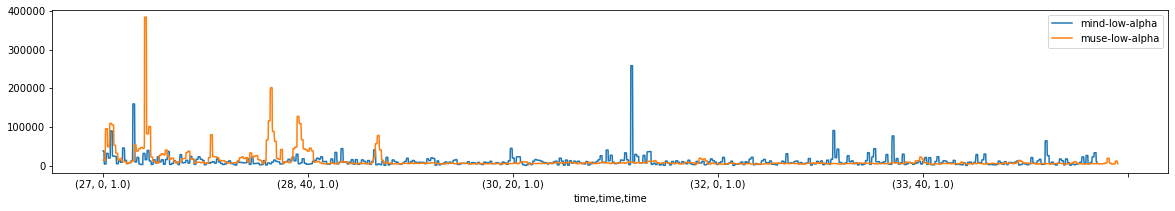

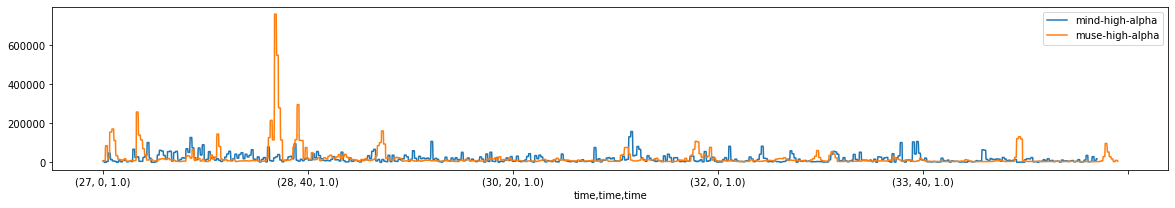

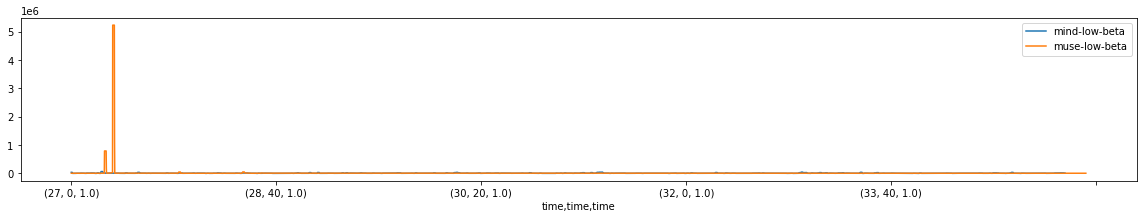

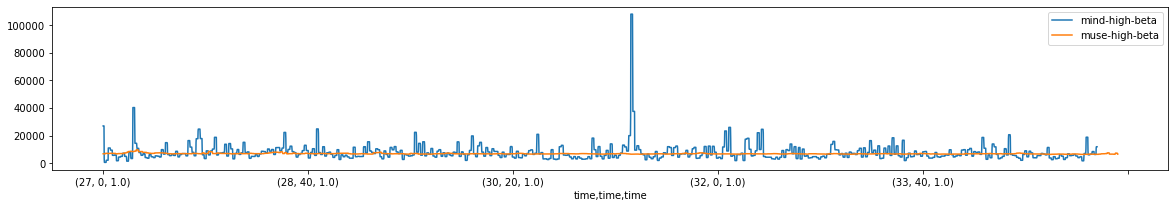

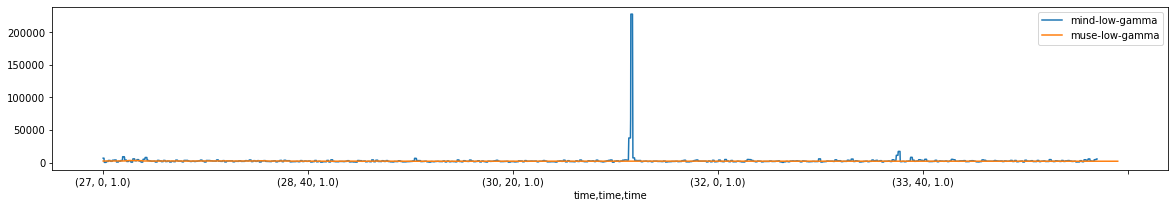

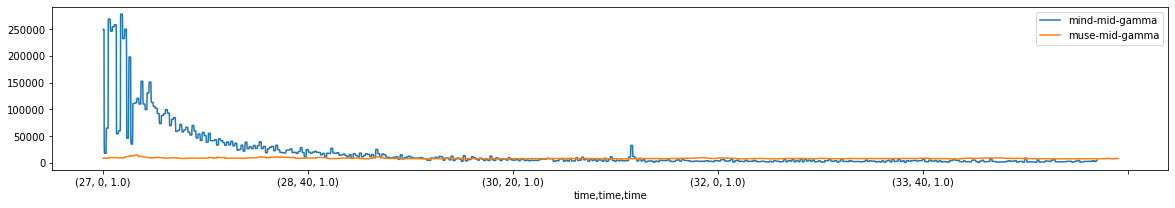

In [17]:
for col in mind_df.columns:
    mind_df[col].plot(figsize=(20, 3), label=f'mind-{col}', legend=True)
    muse_df[col].plot(figsize=(20, 3), label=f'muse-{col}', legend=True)
    plt.show()